In [1]:
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import nltk

In [5]:
df=pd.read_csv(r"G:\datasets\abcnews-date-text.csv")

In [6]:
df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


In [7]:
df=df.sample(500)

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [9]:
from wordcloud import WordCloud

In [10]:
s=stopwords.words('english')

In [11]:
def preprocess(text):
    text=text.lower()
    w=word_tokenize(text)
    l=WordNetLemmatizer()
    words=[l.lemmatize(x) for x in w if x not in s]
    return words

In [12]:
df['pre_text']=df['headline_text'].apply(preprocess)

In [13]:
df

,publish_date,headline_text,pre_text
168715,20050609,wing and fitzgibbon healthy daley in hospital for,"[wing, fitzgibbon, healthy, daley, hospital]"
218414,20060214,chinese divers dominate grand prix meet,"[chinese, diver, dominate, grand, prix, meet]"
65719,20040110,parmalat investigators raid bank of america,"[parmalat, investigator, raid, bank, america]"
528323,20100329,floodwaters cut off returning residents,"[floodwaters, cut, returning, resident]"
738214,20121105,w league rd3 highlights melbourne vs newcastle,"[w, league, rd3, highlight, melbourne, v, newc..."
...,...,...,...
346289,20071125,kookaburras hold nz to a draw,"[kookaburra, hold, nz, draw]"
803493,20130717,sam rainsy speaks to asia pacific,"[sam, rainsy, speaks, asia, pacific]"
403213,20080811,nrl interview jordan rankin,"[nrl, interview, jordan, rankin]"
559238,20100826,calls for more indigenous involvement,"[call, indigenous, involvement]"


In [14]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

di=Dictionary(df['pre_text'])

In [15]:
di

In [16]:
di.filter_extremes(no_below=5,no_above=0.5)

In [17]:
di

In [18]:
bow=[di.doc2bow(x) for x in df['pre_text']]

In [19]:
bow

[[(0, 1)],
 [],
 [],
 [(1, 1), (2, 1)],
 [(3, 1)],
 [(4, 1)],
 [],
 [(5, 1), (6, 1)],
 [],
 [(7, 1)],
 [],
 [],
 [(6, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1)],
 [(12, 1)],
 [(5, 1), (6, 1), (13, 1), (14, 1), (15, 1)],
 [],
 [],
 [],
 [],
 [],
 [(16, 1)],
 [(17, 1), (18, 1)],
 [(19, 1), (20, 1)],
 [],
 [(21, 1)],
 [],
 [(0, 1), (10, 1)],
 [],
 [(22, 1), (23, 1)],
 [],
 [(2, 1)],
 [],
 [(21, 1), (22, 1), (24, 1)],
 [(4, 1)],
 [],
 [(25, 1), (26, 1), (27, 1)],
 [(9, 1), (28, 1)],
 [(4, 1), (29, 1), (30, 1)],
 [],
 [(31, 1)],
 [(29, 1), (30, 1)],
 [],
 [(8, 1), (32, 1)],
 [(18, 1)],
 [],
 [(33, 1), (34, 1)],
 [],
 [],
 [(35, 1)],
 [(12, 1), (36, 1)],
 [(27, 1)],
 [],
 [(2, 1), (37, 1)],
 [],
 [(7, 1)],
 [(11, 1), (33, 1), (38, 1)],
 [(39, 1)],
 [(20, 1), (40, 1)],
 [(40, 1), (41, 1)],
 [(40, 1)],
 [(42, 1)],
 [],
 [],
 [],
 [],
 [(43, 1)],
 [(11, 1), (34, 1)],
 [],
 [(1, 1), (44, 1)],
 [],
 [(26, 1)],
 [],
 [(5, 1), (15, 1), (45, 1)],
 [],
 [(15, 1), (22, 1), (27, 1), (46, 1)],
 [(12, 1)],

In [20]:
num_topics=10

In [21]:
lda=LdaModel(corpus=bow,num_topics=num_topics,id2word=di,passes=20,alpha='auto',eta='auto')

In [22]:
lda.show_topics(log=False,formatted=False)

[(0,
  [('cut', 0.20844264),
   ('melbourne', 0.16748504),
   ('national', 0.10543553),
   ('dead', 0.10541596),
   ('family', 0.10485728),
   ('attack', 0.06410822),
   ('water', 0.048113365),
   ('lead', 0.022795796),
   ('car', 0.02275771),
   ('cup', 0.022745147)]),
 (1,
  [('service', 0.24797961),
   ('call', 0.18925315),
   ('record', 0.11426151),
   ('talk', 0.09557738),
   ('pm', 0.09554922),
   ('industry', 0.0768196),
   ('could', 0.02083228),
   ('farm', 0.020684086),
   ('sydney', 0.0206137),
   ('attack', 0.002688213)]),
 (2,
  [('say', 0.23250407),
   ('health', 0.109335795),
   ('hospital', 0.10735897),
   ('cup', 0.09387306),
   ('set', 0.07853224),
   ('world', 0.078509524),
   ('government', 0.06314443),
   ('accused', 0.063136585),
   ('man', 0.03234571),
   ('future', 0.016943296)]),
 (3,
  [('new', 0.21938345),
   ('school', 0.11037263),
   ('get', 0.09475705),
   ('face', 0.07939186),
   ('pay', 0.07938438),
   ('farmer', 0.079380296),
   ('win', 0.07937346),
   (

In [23]:
wc=WordCloud(height=200,width=200,background_color='black',min_font_size=10)

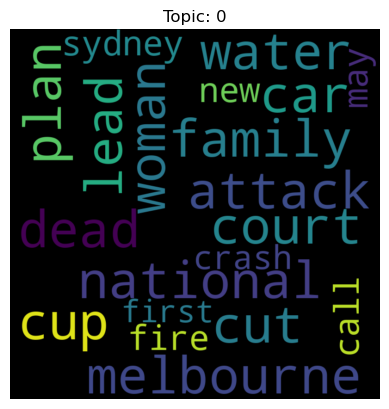

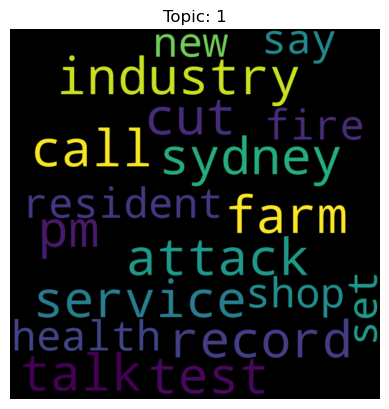

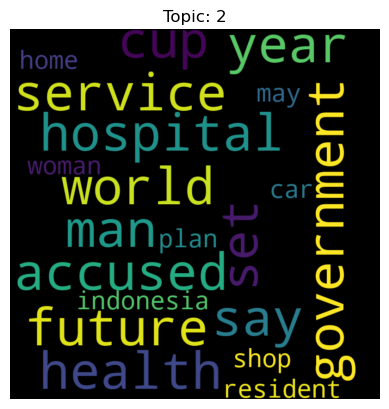

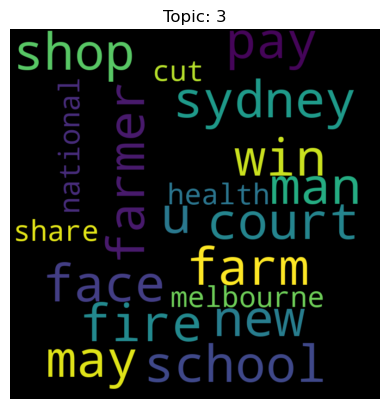

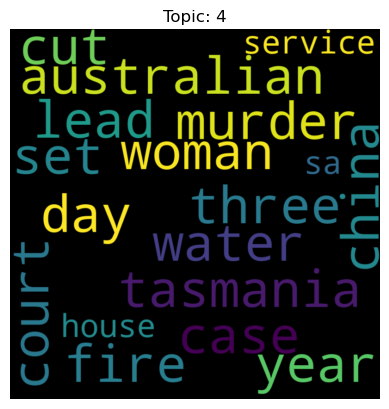

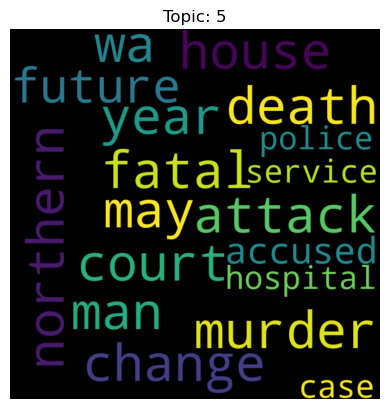

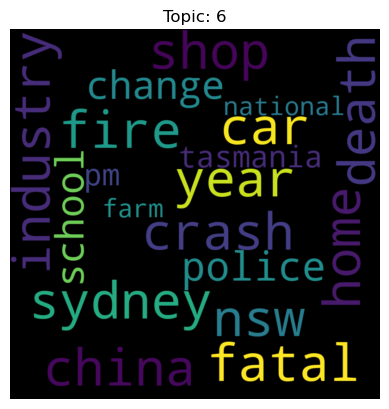

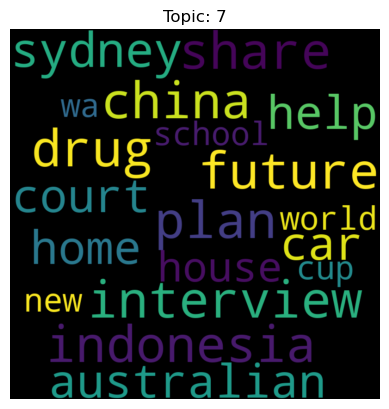

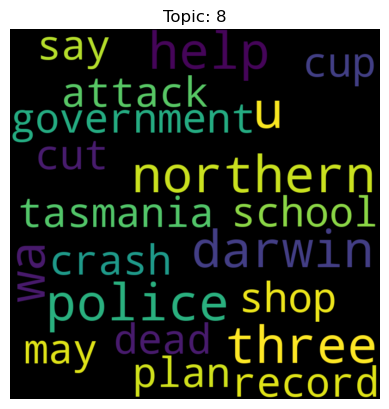

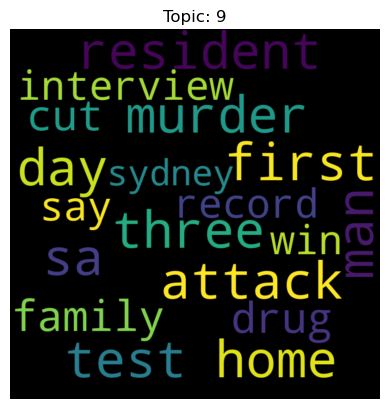

In [24]:
for topic_id,topic in enumerate(lda.show_topics(num_topics=num_topics,num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

In [25]:
import seaborn as sns

In [26]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda,corpus=bow,dictionary=di)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.163096  0.108315       1        1  11.652741
2      0.005085 -0.117024       2        1  11.241504
3     -0.177693 -0.210520       3        1  11.220364
8      0.084147  0.024332       4        1  10.433695
5      0.048762 -0.126939       5        1   9.927175
1     -0.235489  0.075284       6        1   9.534551
7     -0.085901  0.167488       7        1   9.443657
9      0.132152 -0.145715       8        1   9.130721
0      0.134497  0.081067       9        1   8.861338
6     -0.068658  0.143714      10        1   8.554254, topic_info=         Term       Freq      Total Category  logprob  loglift
27     police  13.000000  13.000000  Default  30.0000  30.0000
12          u  13.000000  13.000000  Default  29.0000  29.0000
4         say  13.000000  13.000000  Default  28.0000  28.0000
9     service  13.000000  13.000000  Default  27.0000  27.0000
10        new  12.000000  12.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
34        man   0.087764  12.299236  Topic10  -6.1647  -2.4839
2    resident   0.087763   6.224652  Topic10  -6.1647  -1.8029
33       drug   0.087763   7.731288  Topic10  -6.1647  -2.0197
10        new   0.087762  12.808175  Topic10  -6.1647  -2.5245
49  interview   0.087759   8.588272  Topic10  -6.1647  -2.1248

[461 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
13        8  0.750947        :
69        2  0.581285  accused
69        5  0.193762  accused
8         4  0.140092   attack
8         5  0.140092   attack
...     ...       ...      ...
30        2  0.784389    world
42        1  0.253774     year
42        2  0.126887     year
42        5  0.253774     year
42       10  0.380661     year

[116 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 9, 6, 2, 8, 10, 1, 7])

In [27]:
lda.log_perplexity(bow)

-5.066170827065762

In [28]:
from gensim.models import CoherenceModel

In [36]:
coh=CoherenceModel(model=lda,texts=df['pre_text'],dictionary=di,coherence='c_v')

In [37]:
coh.get_coherence()

0.6869662186324209

In [31]:
def cohe(dictionary,corpus,texts,limit,start,step):
    co=[]
    model=[]
    for num_topics in range(start,limit,step):
        mod=LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topics,passes=20)
        model.append(mod)
        c=CoherenceModel(model=mod,texts=texts,dictionary=dictionary,coherence='u_mass')
        co.append(c.get_coherence())
        
    return model,co
    

In [33]:
start=2
limit=30
step=5
model_list,coherence_list=cohe(corpus=bow,dictionary=di,texts=df['pre_text'],start=2,limit=30,step=5)

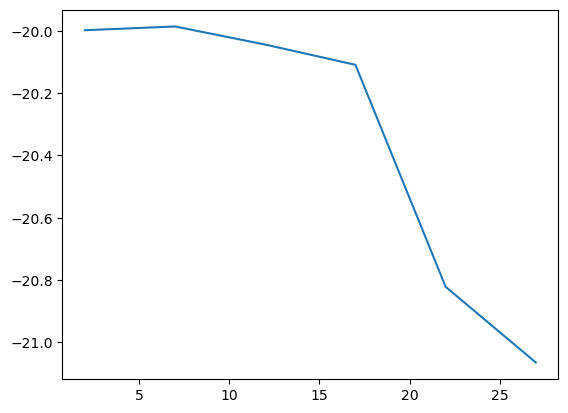

In [34]:
x=range(start,limit,step)
plt.plot(x,coherence_list)

In [35]:
coherence_list

[-19.997326075688278,
 -19.985240242798486,
 -20.04342313256684,
 -20.10849921537619,
 -20.822145176219493,
 -21.065544295619606]